Import the needed packages.

In [4]:
from types import SimpleNamespace
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import statsmodels.api as sm
import pandas as pd
%load_ext autoreload
%autoreload 2

from HouseholdSpecializationModel import HouseholdSpecializationModelClass

QUESTION 1:

Illustrate how HF/HM changes when varying α={0.25, 0.5, 0.75} and σ={0.5, 1.0, 1.5}

The code below is used for creating a table with the ratio of HF/HM for varying values of α and σ.

In [5]:
# Question 1, table
from tabulate import tabulate

# create an instance of the model
model = HouseholdSpecializationModelClass()

# Define the values of alpha and sigma 
alpha_vals = [0.25, 0.5, 0.75]
sigma_vals = [0.5, 1.0, 1.5]

# Create an empty data frame
results_df = pd.DataFrame(columns=['alpha', 'sigma'])
# kan tilføjes for at se værdier af HF, HM, LM, og LF: 'opt.HF_HM'

#Loop over alpha and sigma values and solve the model for each combination
for alpha in alpha_vals:
    for sigma in sigma_vals:
        # Set the parameter values 
        model.par.alpha = alpha 
        model.par.sigma = sigma 

        # Solve the model 
        opt = model.solve_discrete()
        resultat = opt.HF / opt.HM

        #Store the results in the DataFrame
        results_df = results_df.append({'alpha': alpha, 'sigma': sigma, 'Ratio HF/HM': resultat}, ignore_index=True)
        # Kan tilføjes, 'opt.HF_HM': opt

# Format the table
#table = tabulate(results_df, headers='keys', tablefmt='fancy_grid', stralign='center', numalign='center')

#Print the results
#print(table) 

# reshape the data into a 3x3 matrix
matrix = results_df.pivot(index='alpha', columns='sigma', values='Ratio HF/HM')

# Format the table
#table = tabulate(matrix, headers='keys', tablefmt='fancy_grid', stralign='center', numalign='center')

# Print the results
#print(table)
df=pd.DataFrame(matrix)
df.style

/Users/lucasnielsen/Library/Mobile Documents/com~apple~CloudDocs/KU 8. Semester/Introduction to programming and numerical analysis/projects-2023-git/K/HouseholdSpecializationModel.py:63: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/lucasnielsen/Library/Mobile Documents/com~apple~CloudDocs/KU 8. Semester/Introduction to programming and numerical analysis/projects-2023-git/K/HouseholdSpecializationModel.py:63: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/lucasnielsen/Library/Mobile Documents/com~apple~CloudDocs/KU 8. Semester/Introduction to programming and numerical analysis/projects-2023-git/K/HouseholdSpecializationModel.py:67: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-

sigma,0.500000,1.000000,1.500000
alpha,,,
0.250000,0.545455,0.307692,0.214286
0.500000,1.000000,1.000000,1.000000
0.750000,1.833333,3.250000,4.666667


The code below is used to create a figure of the results from the table above.

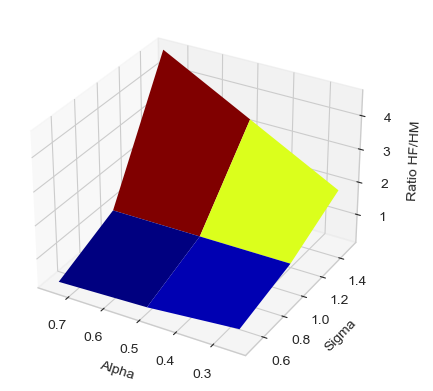

In [5]:
# Question 1, Figure 

# import plot modules
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm # for colormaps

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract the values from the results DataFrame
x = results_df['alpha']
y = results_df['sigma']
z = results_df['Ratio HF/HM']

# Reshape the data into a grid
X, Y = np.meshgrid(np.unique(x), np.unique(y))
Z = z.values.reshape(len(np.unique(y)), len(np.unique(x)))

# Create the surface plot
ax.plot_surface(X, Y, Z, cmap=cm.jet)

# Invert the x-axis
ax.invert_xaxis()

# Set the labels for the axes
ax.set_xlabel('Alpha')
ax.set_ylabel('Sigma')
ax.set_zlabel('Ratio HF/HM')

# Show the plot
plt.show()

This figure shows the ratio for varying values of α and σ. 

The figure can be interpreted as α and σ both having a positive effect on the ratio. When α and σ increases, this increases the ratio, which means that women will work relatively more at home compared to men. We see that when alpha is 0.25, then an increasing sigma will decrease the ratio, while for a high alpha of 0.5, then an increasing sigma will increase the ratio. When alpha is exactly equal to 0.75, then ratio is 1, which means that men and women are working exactly equal amount of hours at home. The intuition behind the results is as alpha increases, the women become relatively more productive in home production compared to men, and hence the ratio increases. When sigma increases the elasticity of substitution increases, which for α<0.5 implies a lower ratio, and for α>0.5 implies a higher ratio, due to the fact that when the elasticity of substitution increases it is easier to substitute between women and men working at home, which means the effect from alpha will dominate their choices.
When σ>1 there is increasing return to scale in household production, which implies positive effects from specialization in home production and hence more dependency on the alpha parameter.

QUESTION 2 

The code below is used to plot the log(HF/HM) against log(wF/wM) for wF = [0.8, 0.9, 1.0, 1.1, 1.2]

/Users/lucasnielsen/Library/Mobile Documents/com~apple~CloudDocs/KU 8. Semester/Introduction to programming and numerical analysis/projects-2023-git/K/HouseholdSpecializationModel.py:67: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


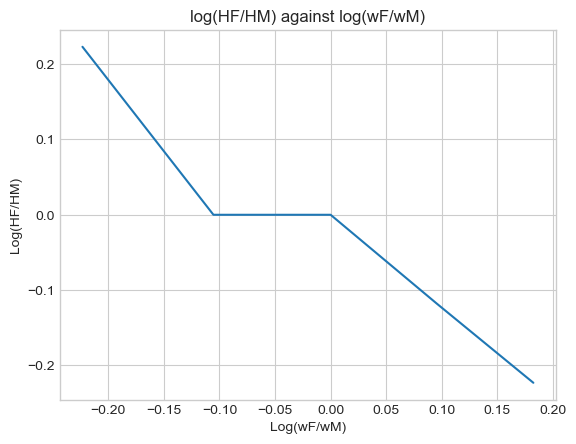

In [55]:
# Question 2, Plot

# create an instance of the model
#model = HouseholdSpecializationModelClass()

# Create vector for wF
model.par.wF_vec = np.array([0.8, 0.9, 1.0, 1.1, 1.2])

# create empty lists to store log(HF/HM) and log(wF/wH)
log_HF_HM_list = []
log_wF_wM_list = []

# loop over the values in wF_vec and solve the model for each value
for wF in model.par.wF_vec:
    model.par.wF = wF
    model.par.sigma = 1
    model.par.alpha = 0.5 
    opt = model.solve_discrete()
    log_HF_HM_list.append(math.log(opt.HF_HM))
    log_wF_wM_list.append(math.log(wF / model.par.wM))

# plot log(HF/HM) against log(wF/wH)
plt.plot(log_wF_wM_list, log_HF_HM_list)
plt.xlabel('Log(wF/wM)')
plt.ylabel('Log(HF/HM)')
plt.title('log(HF/HM) against log(wF/wM)')
plt.show()


The figure above shows a negative correlation between the change in wages from working in the market and the change in ratio of hours working at home. The figure shows that when men and women earns the same from working in the market, they are working an equal amount of hours at home. When women earns less than men, then women works more at home than men, and vice versa when men women earns more than men. We also notice that the slope is higher numerically when the relative wages decrease, compared to when the relative wages increase. This is in line with our theoretical expectations, and we assume that the causality goes from the wages to the hours working at home.

QUESTION 3 

The code below is used to plot log(HF/HM) against log(wF/wM) for wF = [0.8, 0.9, 1.0, 1.1, 1.2] when the choice set is continuous. 

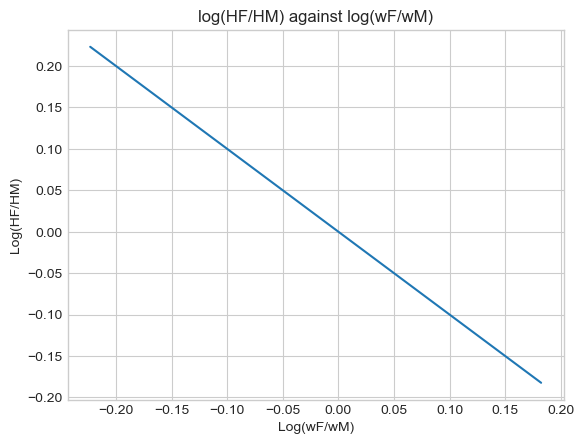

In [56]:
# Question 3, Plot

# create an instance of the model
#model = HouseholdSpecializationModelClass()

# Create vector for wF
model.par.wF_vec = np.array([0.8, 0.9, 1.0, 1.1, 1.2])

# create empty lists to store log(HF/HM) and log(wF/wH)
log_HF_HM_list = []
log_wF_wM_list = []

# loop over the values in wF_vec and solve the model for each value
for wF in model.par.wF_vec:
    model.par.wF = wF
    model.par.sigma = 1
    model.par.alpha = 0.5
    opt = model.solve()
    log_HF_HM_list.append(opt[0])
    log_wF_wM_list.append(opt[1])
    #print(opt)

# plot log(HF/HM) against log(wF/wH)
plt.plot(log_wF_wM_list, log_HF_HM_list)
plt.xlabel('Log(wF/wM)')
plt.ylabel('Log(HF/HM)')
plt.title('log(HF/HM) against log(wF/wM)')
plt.show()


The plot above shows the correlation between the changes in the relative wages to the change in the relative amount of hours working at home. We see the same picture as in question 2, but with no discontiuity in this graph since the choice set is continuous. This line has the same slope no matter the change in the relative wages. 

QUESTION 4 

The code below chooses α and σ such that it minimizes (β0-β0\hat)^2+(β1-β1\hat)^2, and illustrates how the model fit the data.

/Users/lucasnielsen/Library/Mobile Documents/com~apple~CloudDocs/KU 8. Semester/Introduction to programming and numerical analysis/projects-2023-git/K/HouseholdSpecializationModel.py:63: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/lucasnielsen/Library/Mobile Documents/com~apple~CloudDocs/KU 8. Semester/Introduction to programming and numerical analysis/projects-2023-git/K/HouseholdSpecializationModel.py:63: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


Parameter        Value
-----------  ---------
Alpha         0.981987
Sigma         0.100042
Beta0         0.40002
Beta1        -0.100042
Error         0


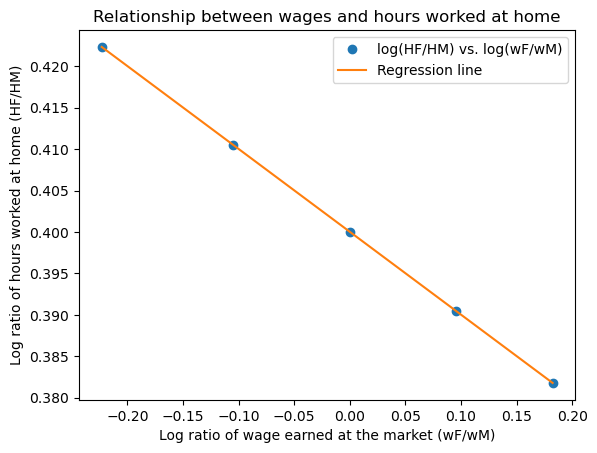

In [6]:
# Estimate the model
model.estimate()

# Calculate log of the ratio of hours worked at home
log_hours_ratio = np.log(model.sol.HF_vec / model.sol.HM_vec)

# Calculate log of the ratio of the wage earned at the market
log_wage_ratio = np.log(model.par.wF_vec / model.par.wM)

# Define the parameter values from the research paper
beta0 = 0.4
beta1 = -0.1

# Calculate the parameter values from the model
alpha = model.par.alpha
sigma = model.par.sigma
beta0_hat = model.sol.beta0
beta1_hat = model.sol.beta1
error = ((beta0 - beta0) ** 2 + (beta1 - beta1) ** 2)

# Create a table of parameter values
table = [["Alpha", alpha], ["Sigma", sigma], ["Beta0", beta0_hat], ["Beta1", beta1_hat], ["Error", error]]
headers = ["Parameter", "Value"]
print(tabulate(table, headers=headers))

# Define the function for the line from the paper of Siminska and Yetsenga (2022)
def regression_line(x):
    return beta0_hat + beta1_hat * x

# Plot log(HF/HM) against log(wF/wM) and the regression line
fig, ax = plt.subplots()
ax.plot(log_wage_ratio, log_hours_ratio, 'o', label='log(HF/HM) vs. log(wF/wM)')
ax.plot(log_wage_ratio, regression_line(log_wage_ratio), label='Regression line')
ax.legend()
ax.set_xlabel('Log ratio of wage earned at the market (wF/wM)')
ax.set_ylabel('Log ratio of hours worked at home (HF/HM)')
ax.set_title('Relationship between wages and hours worked at home')
plt.show()


From the table we see that the parametervalues that minimize the error function is α=0.98 and σ=0.10. We notice that the model fits the data.